In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
plt.rcParams["figure.figsize"]=[12,6]


In [31]:
house=pd.read_csv(r"C:\Desktop\Learnbay\9 june\Machine Learning\Maison.csv")

In [32]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


##  Data Tranformation and Analysis

In [33]:
house=house.rename(index=str,columns={'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [34]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [35]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [36]:
coln=house.columns

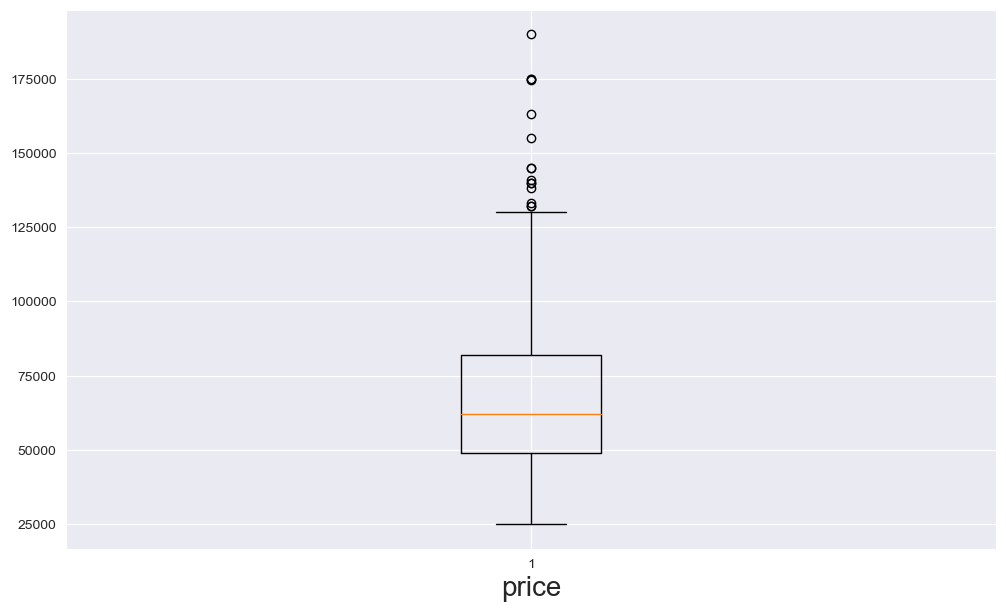

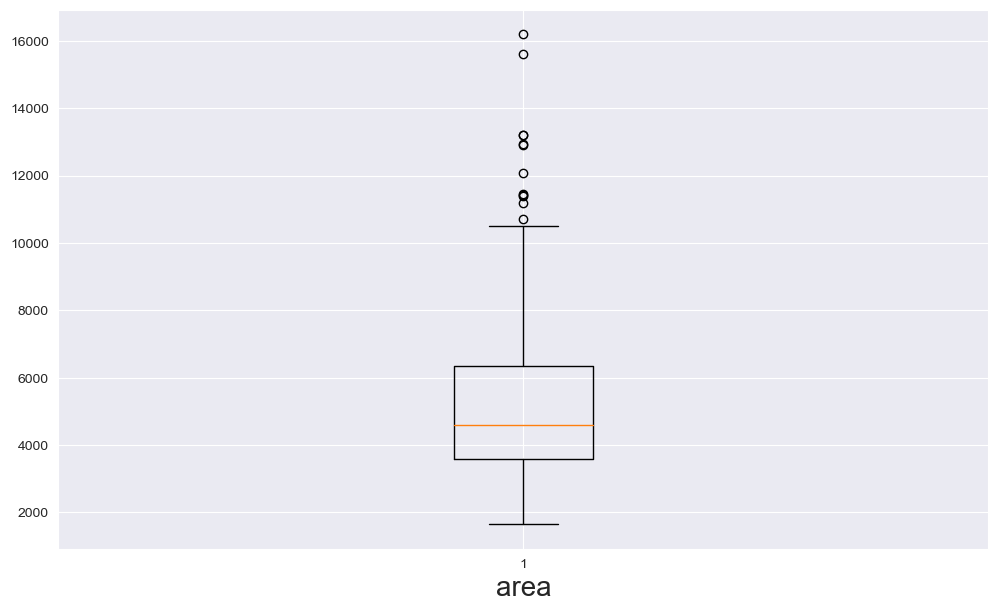

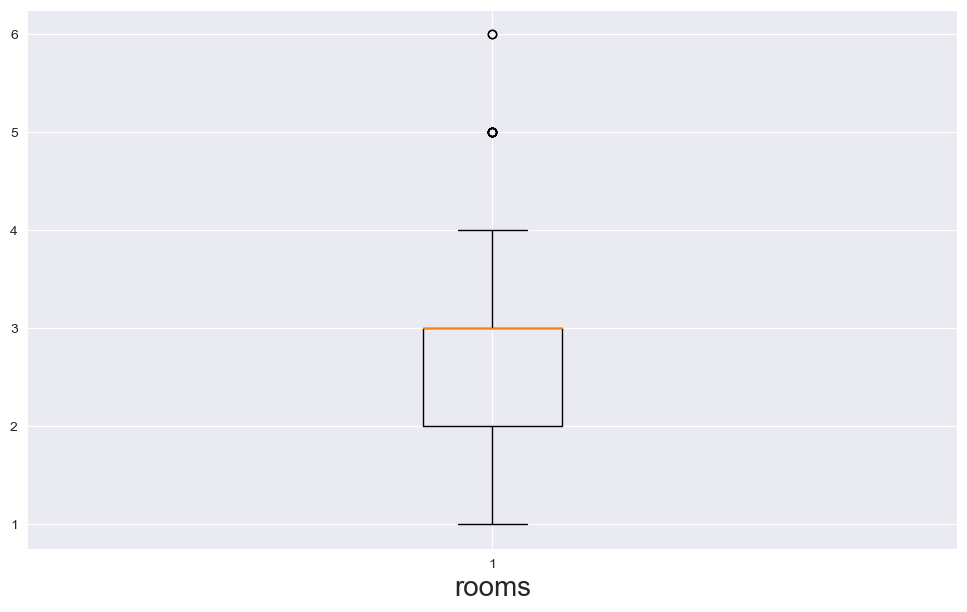

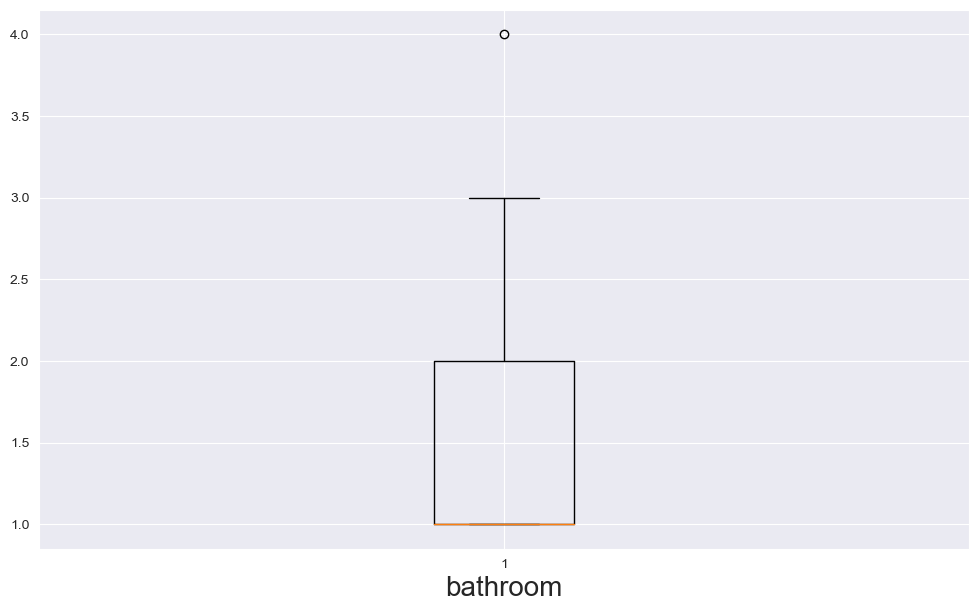

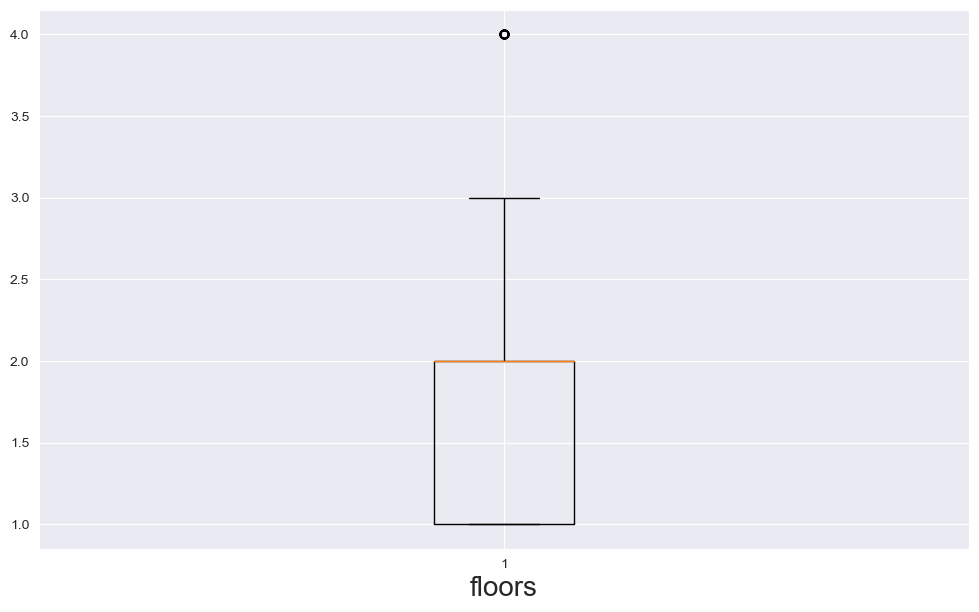

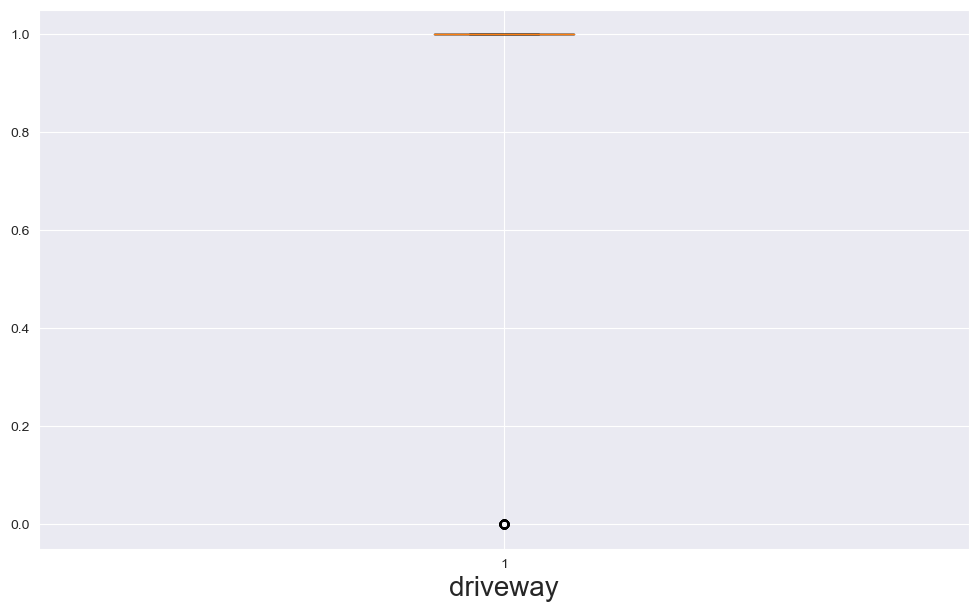

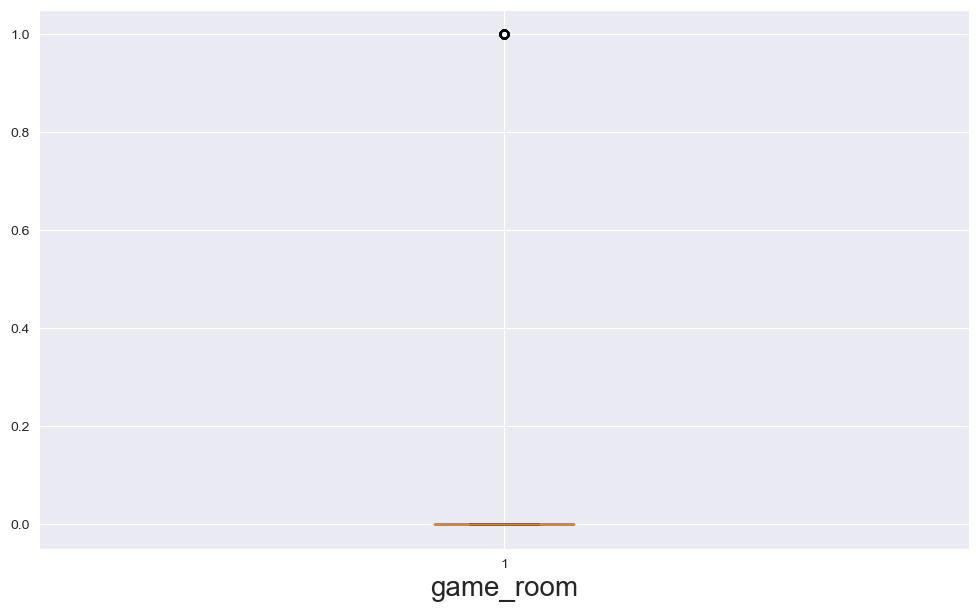

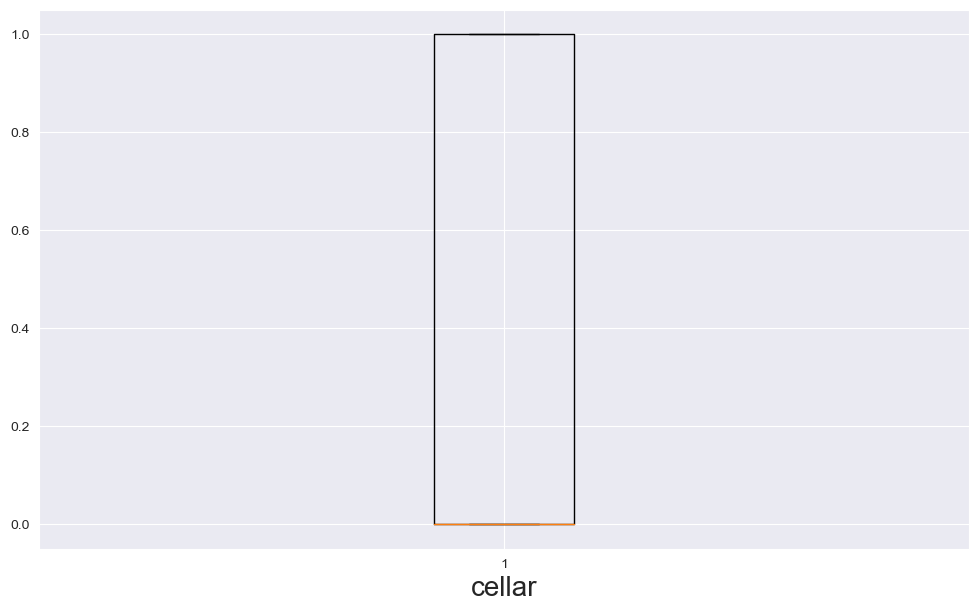

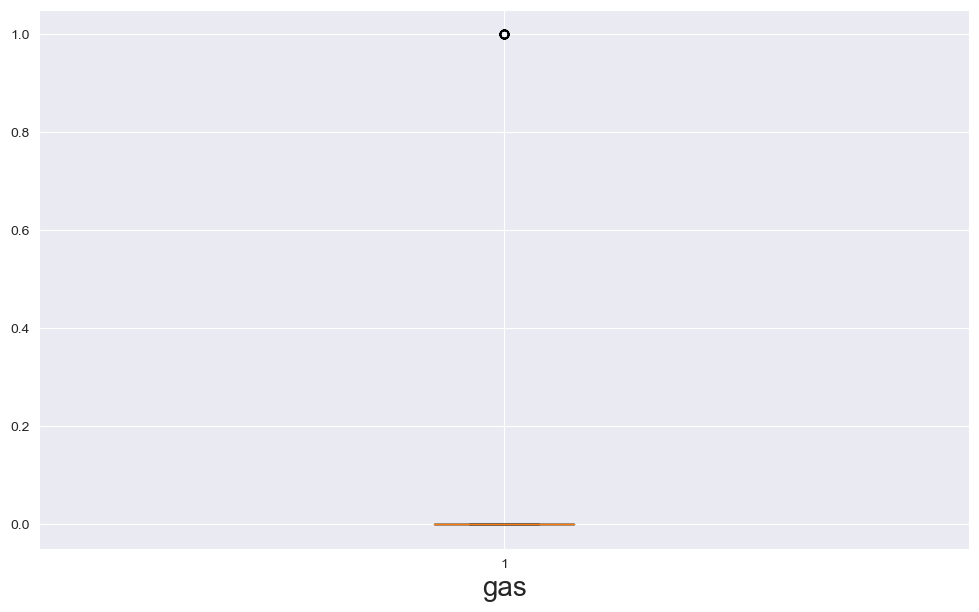

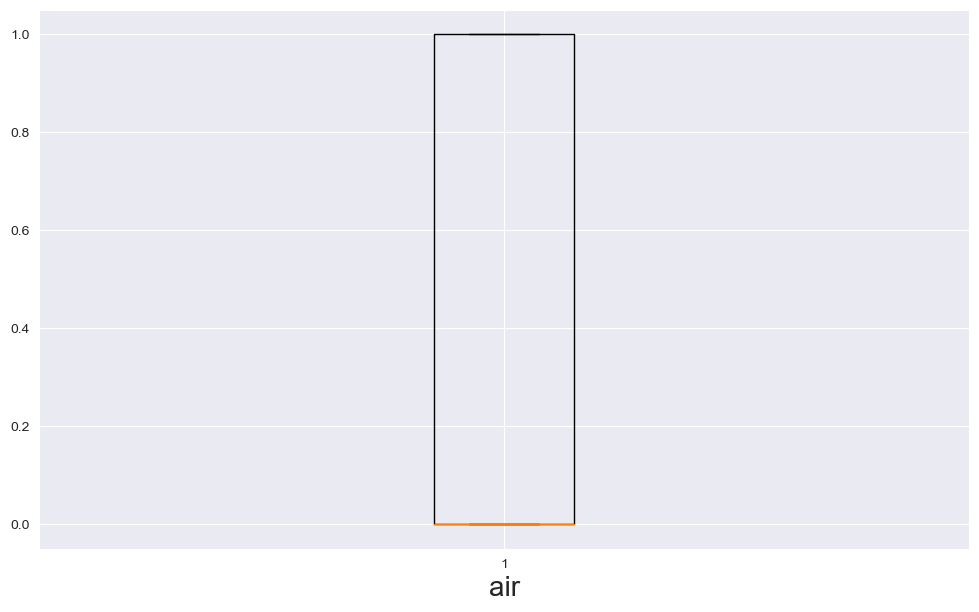

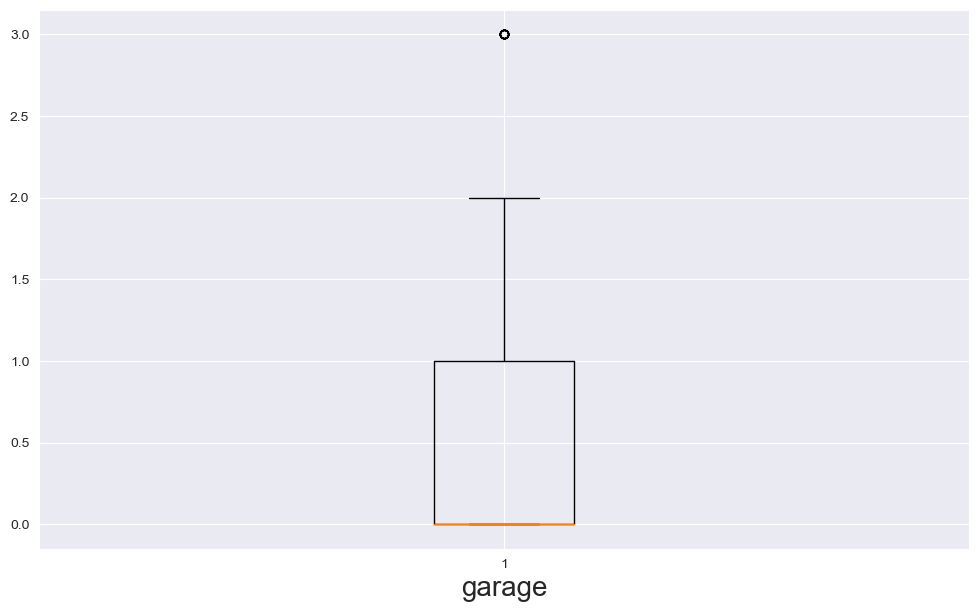

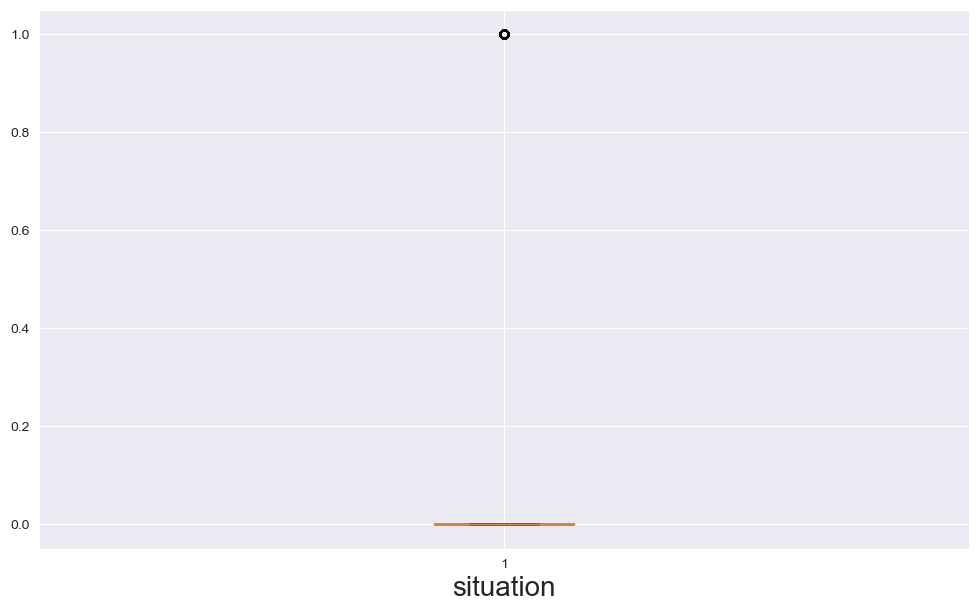

In [40]:
 for i in coln:
        plt.subplots(figsize=(12,7))
        plt.boxplot(house[i])
        plt.xlabel(i,fontsize=20)
        

In [48]:
feature=coln.drop('price')
target='price'
feature

Index(['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

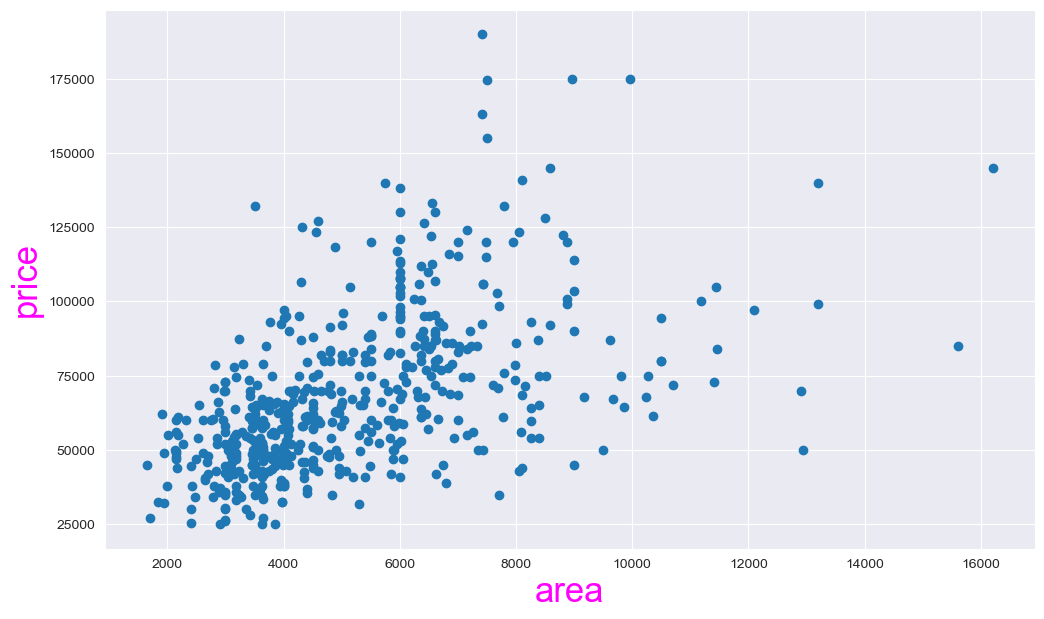

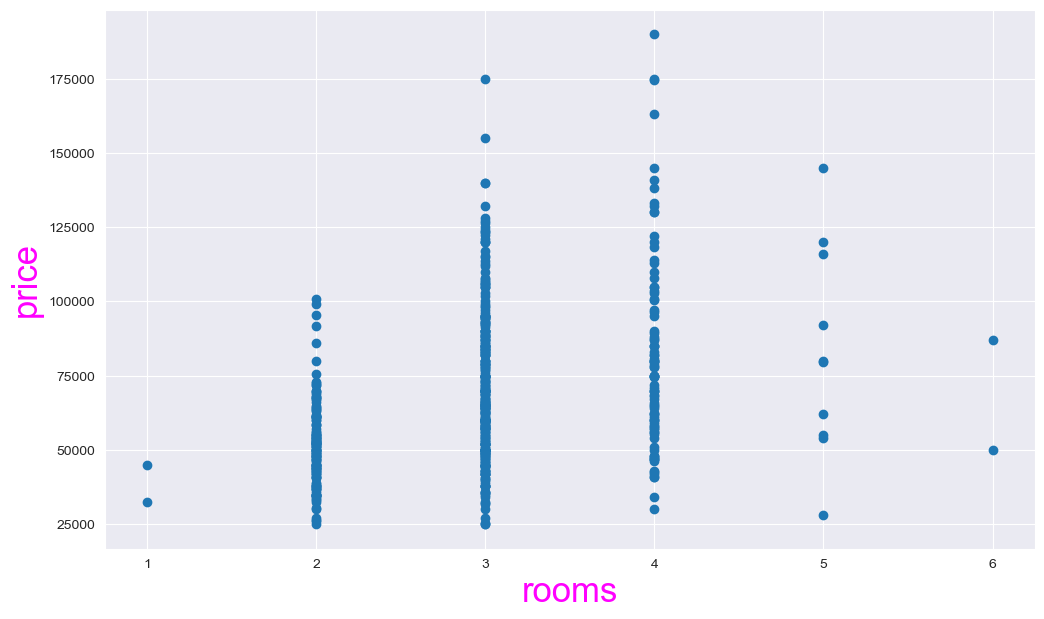

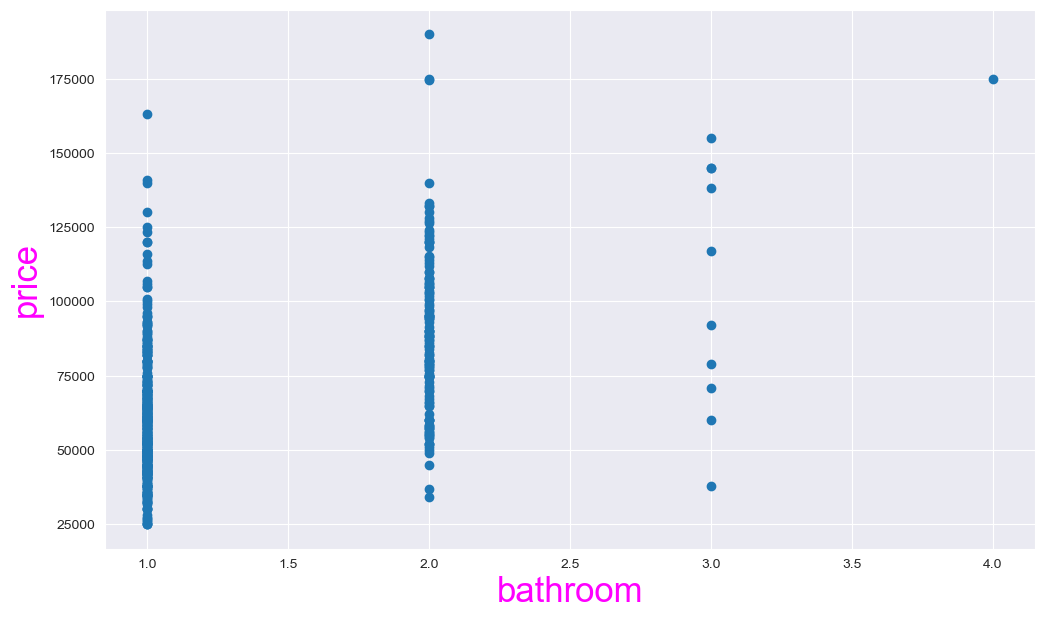

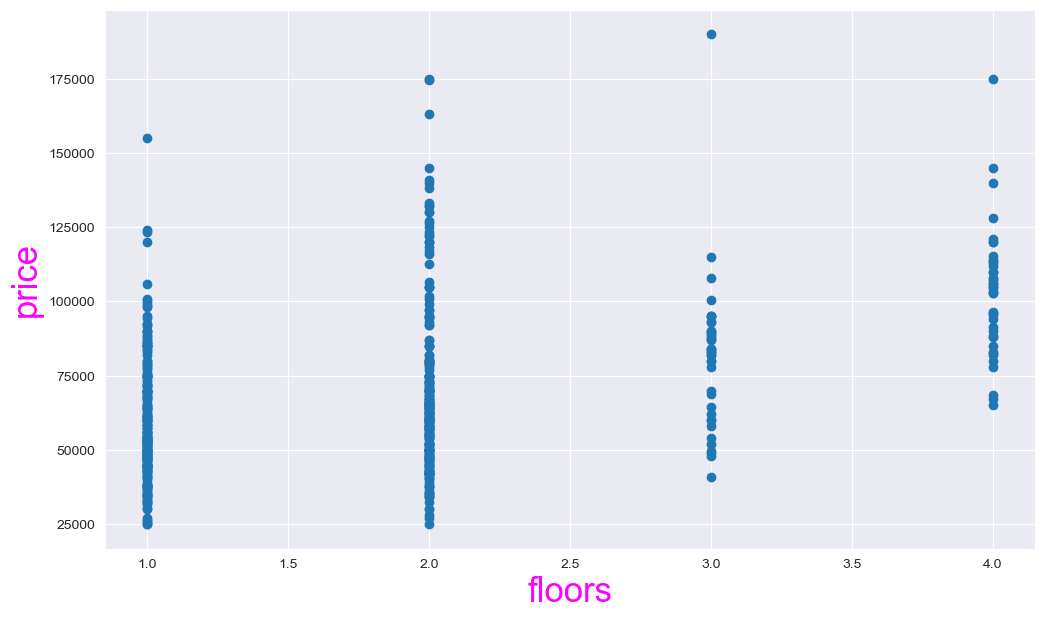

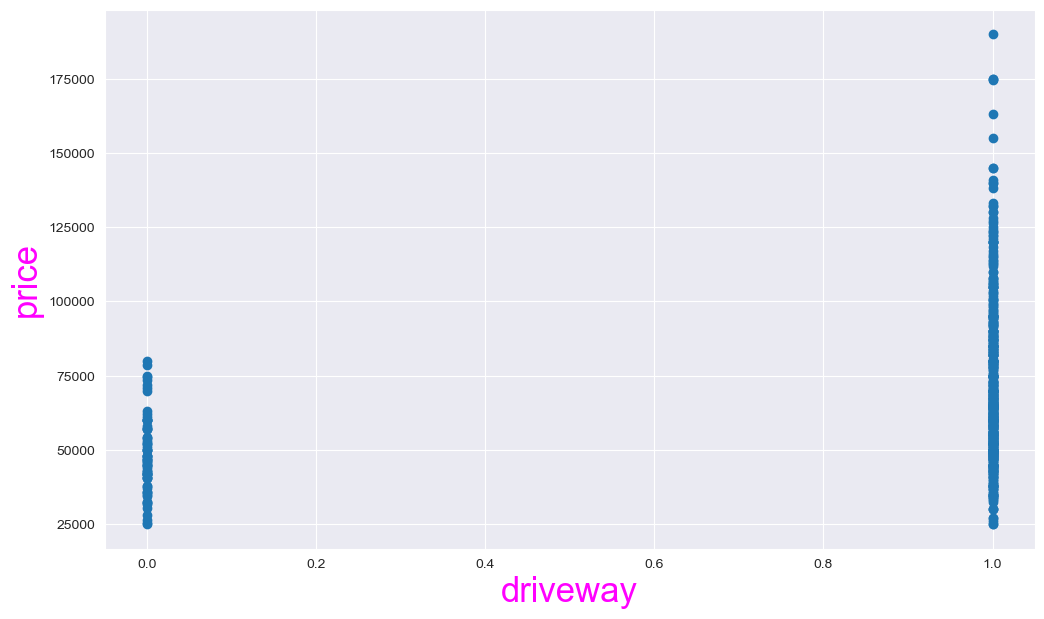

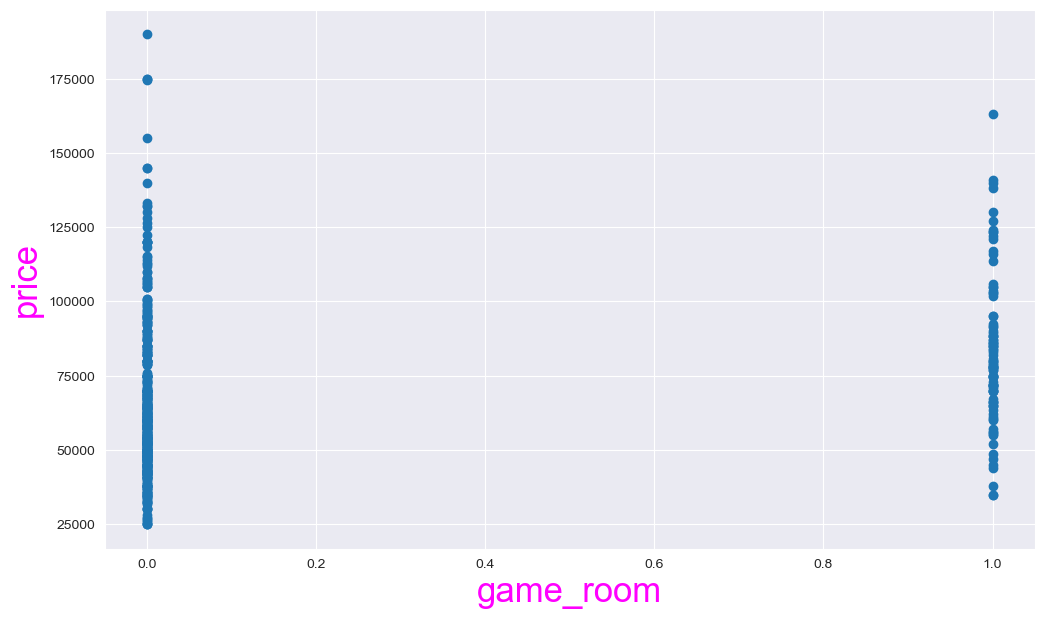

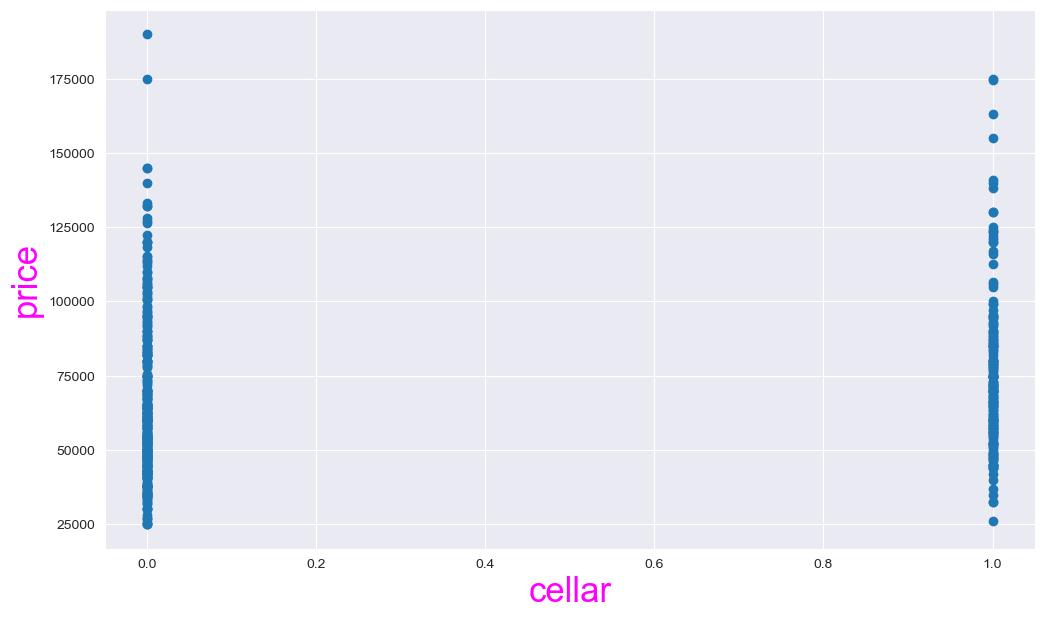

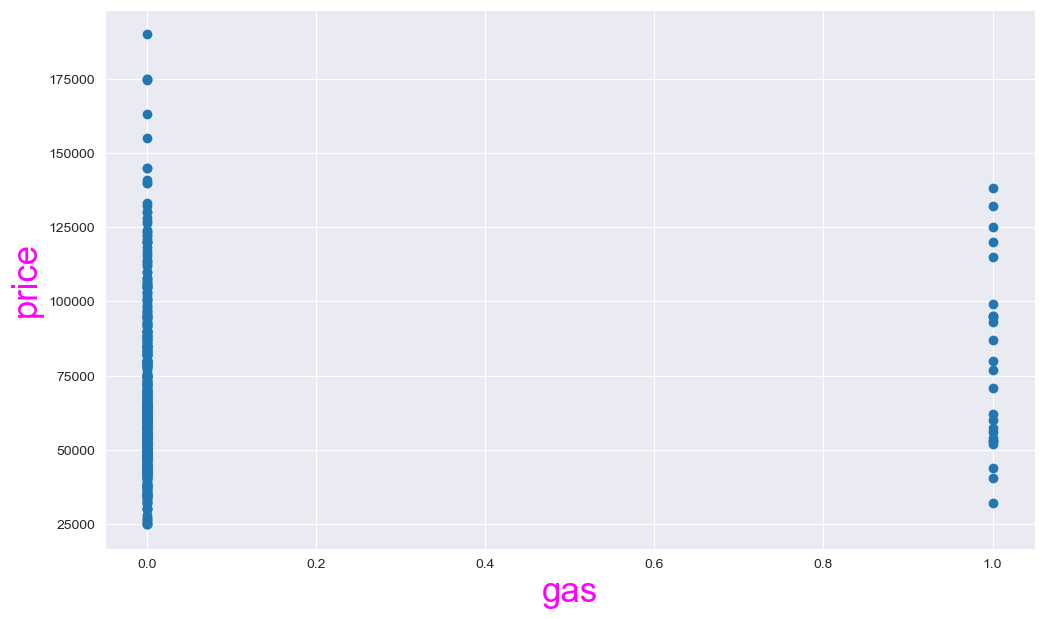

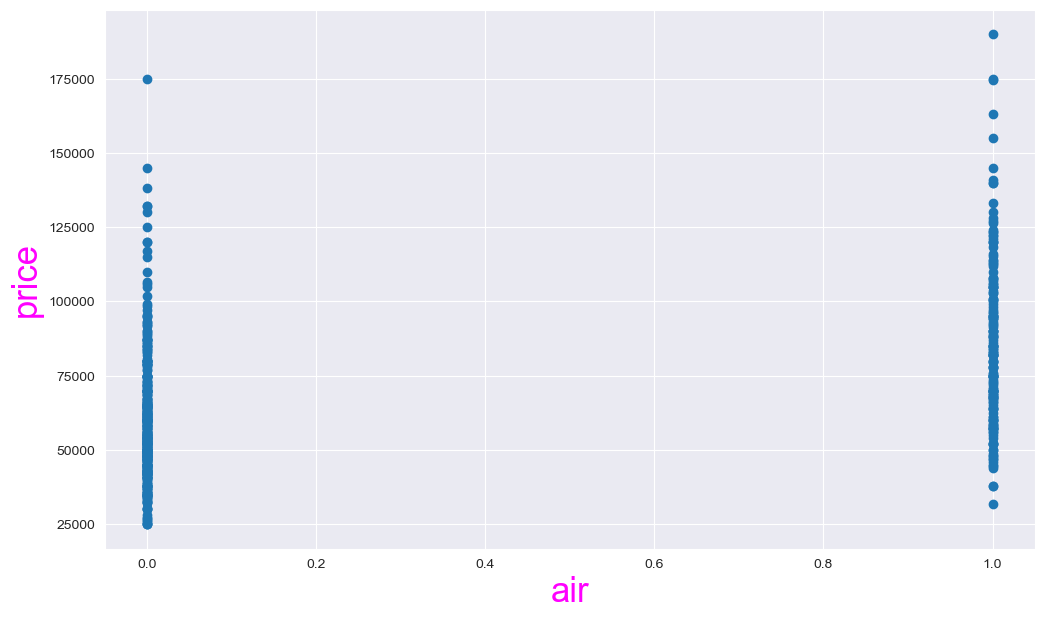

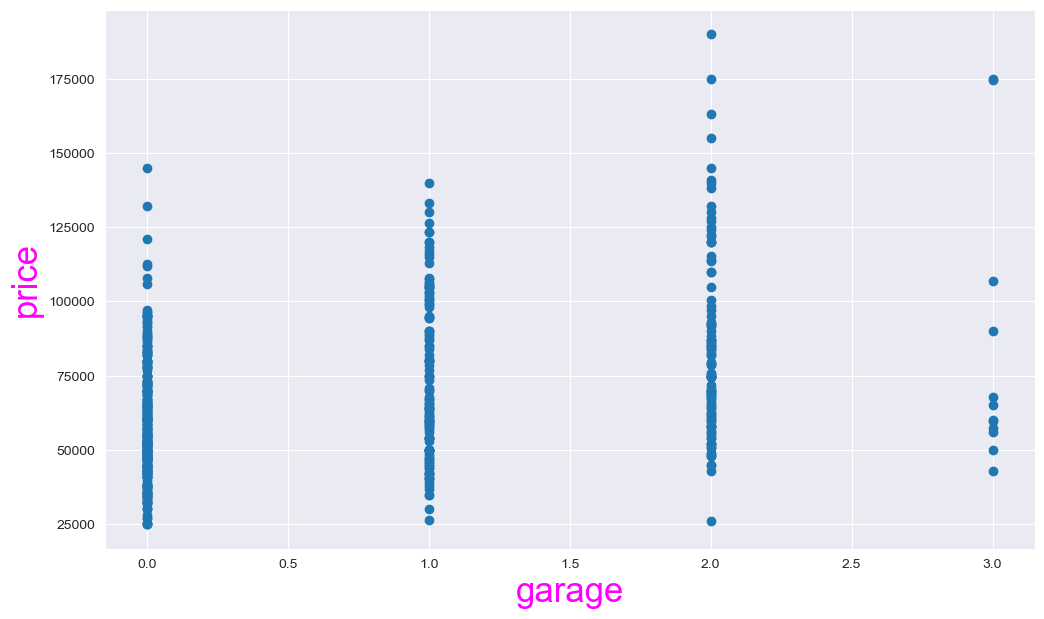

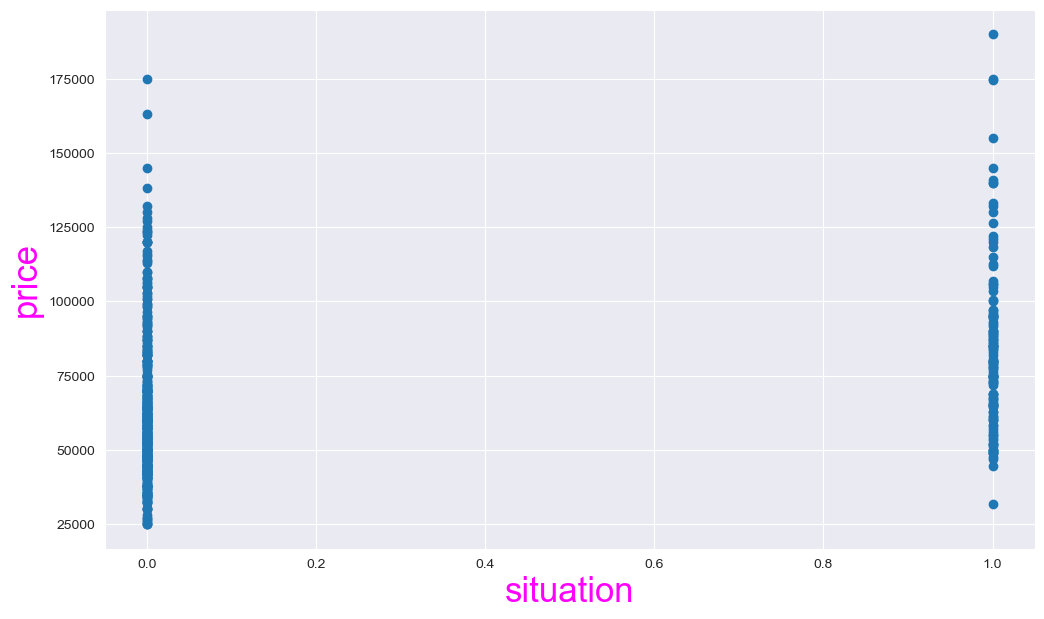

In [57]:
 for i in feature:
        plt.subplots(figsize=(12,7))
        plt.scatter(x=house[i], y=house[target])
        plt.xlabel(i,fontsize=25,color="magenta")
        plt.ylabel(target,fontsize=25,color="magenta")

In [104]:
house1=house.drop(house[house["area"]>14000].index)

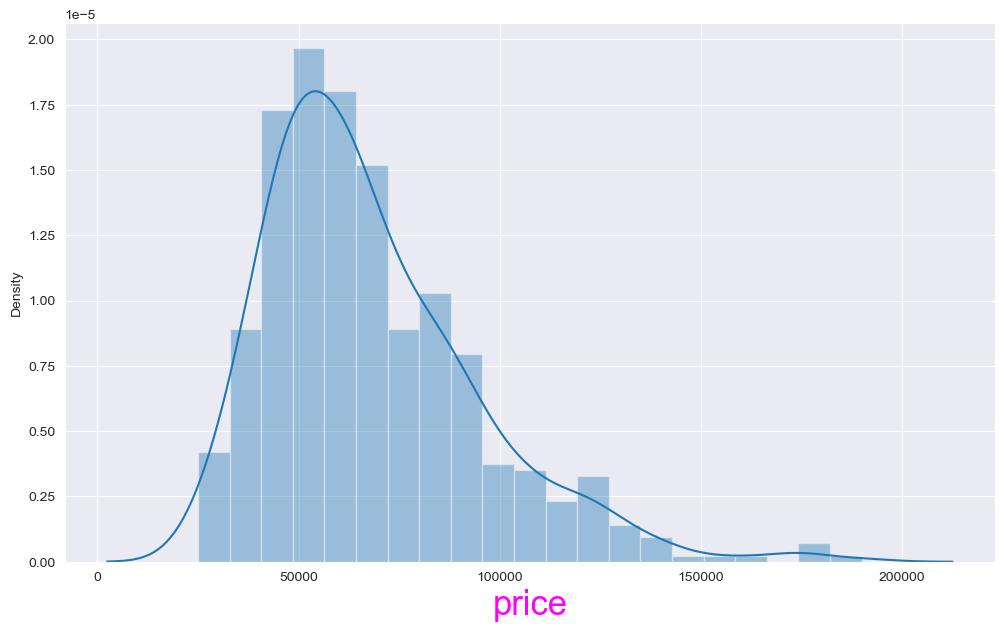

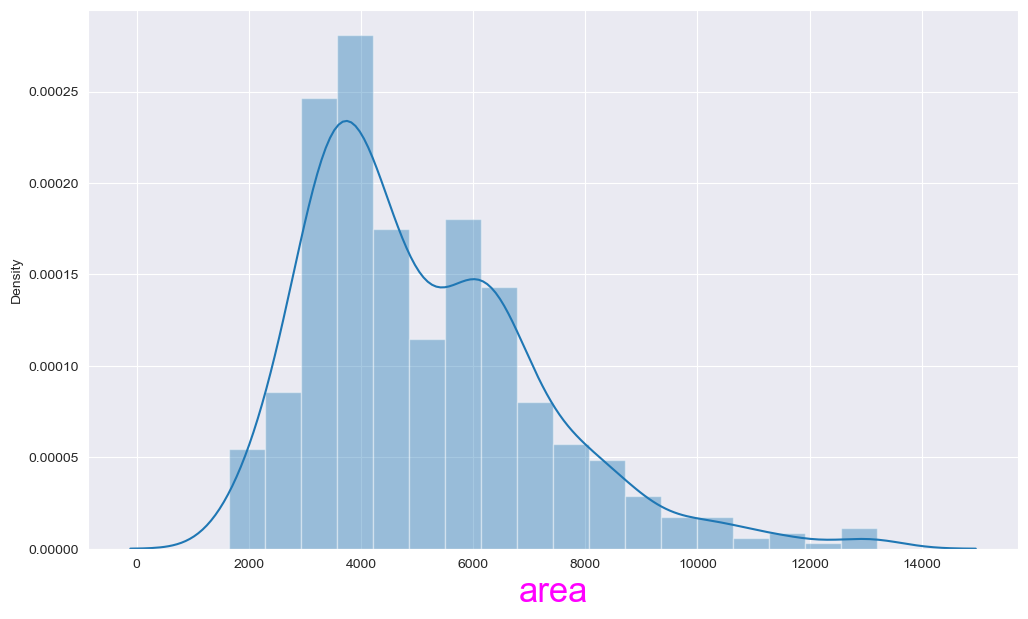

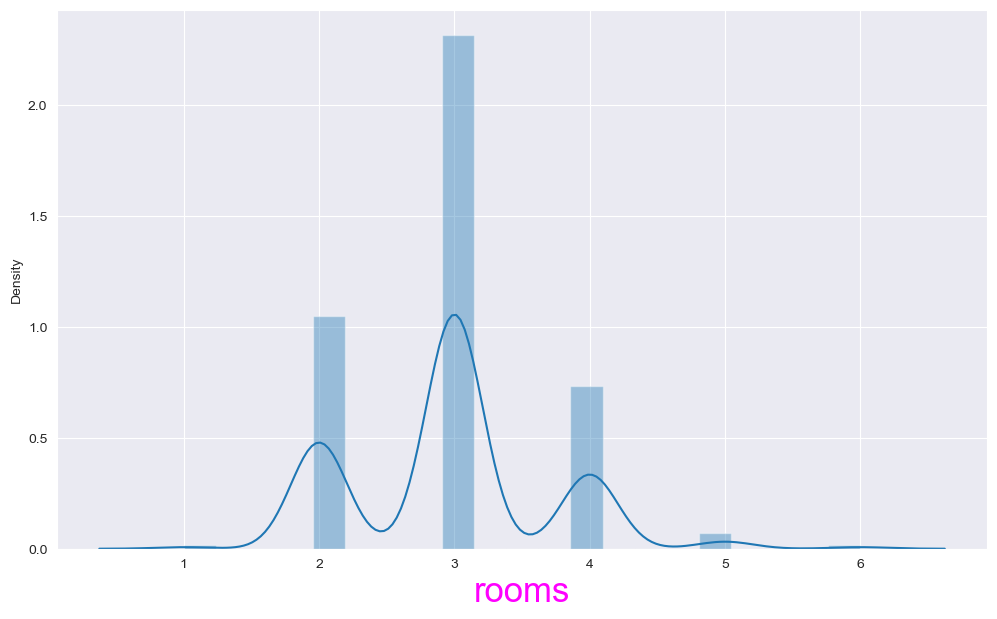

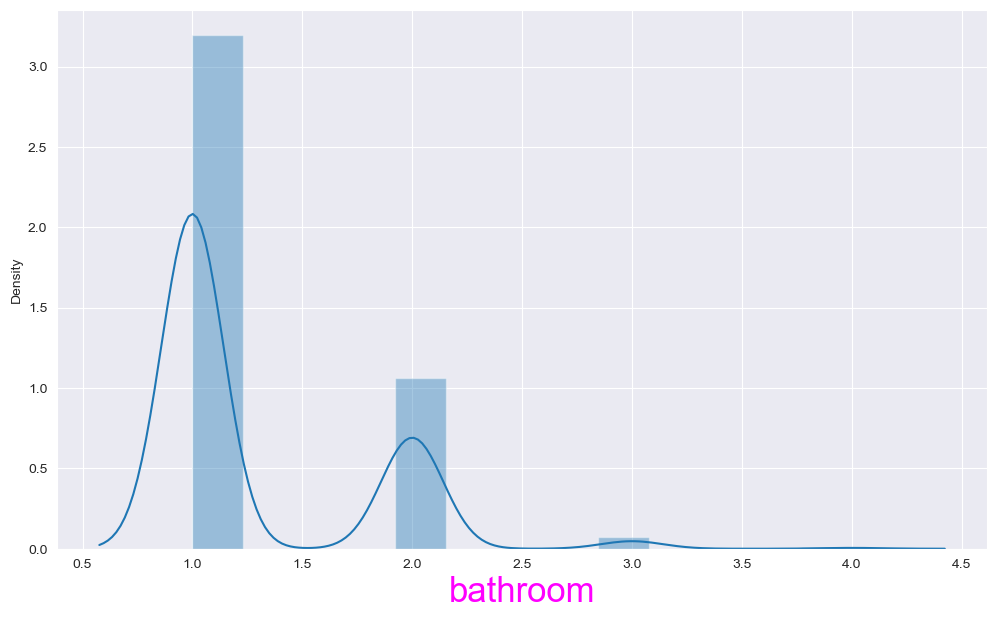

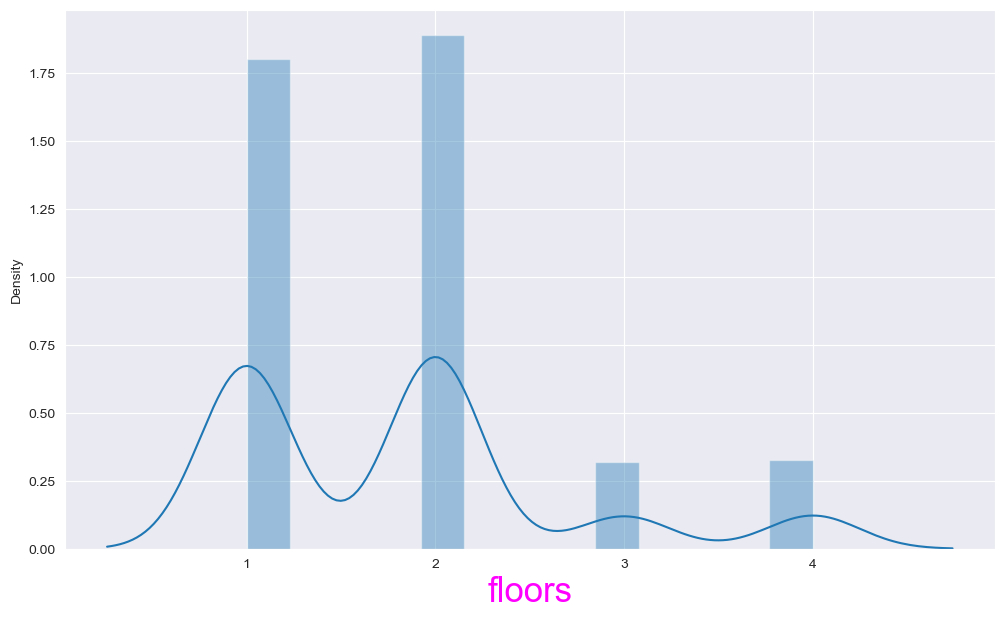

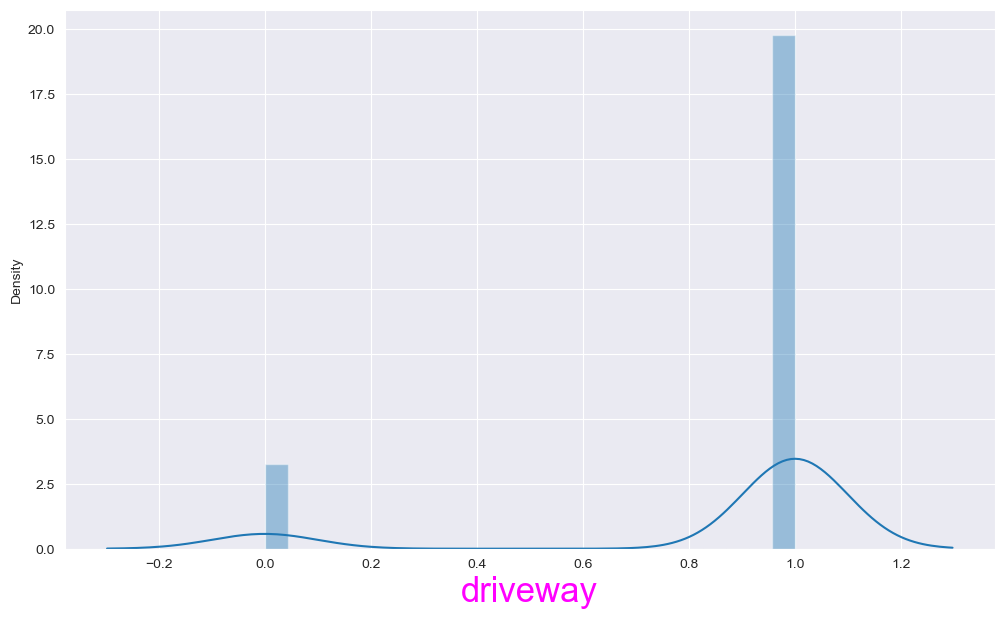

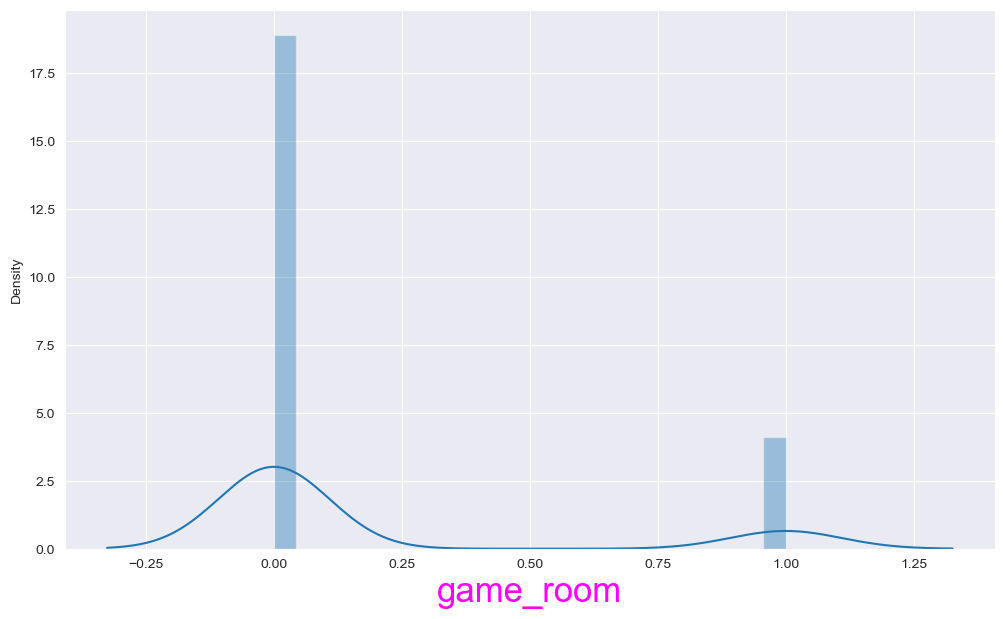

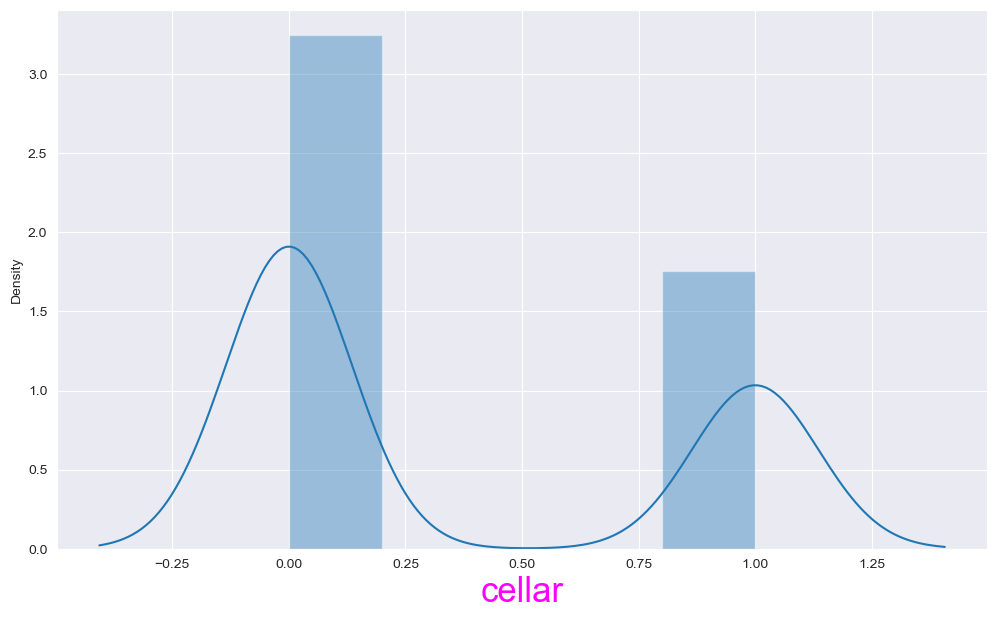

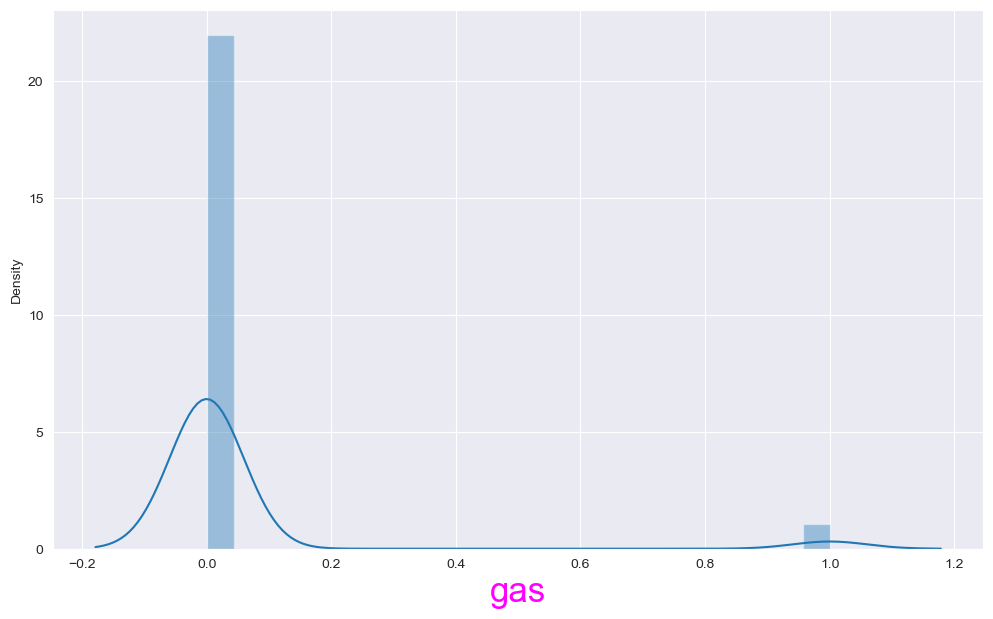

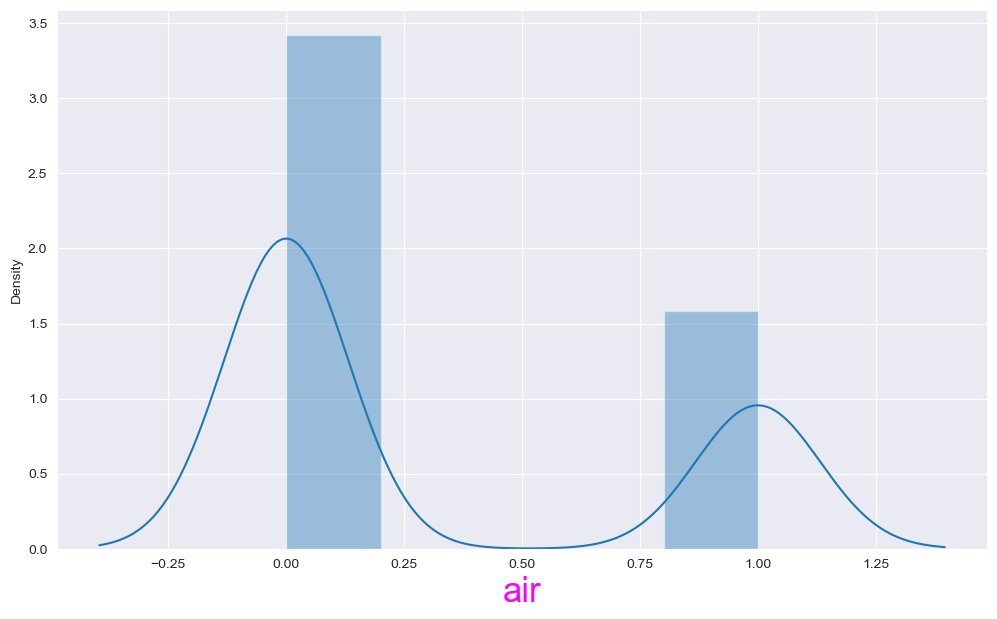

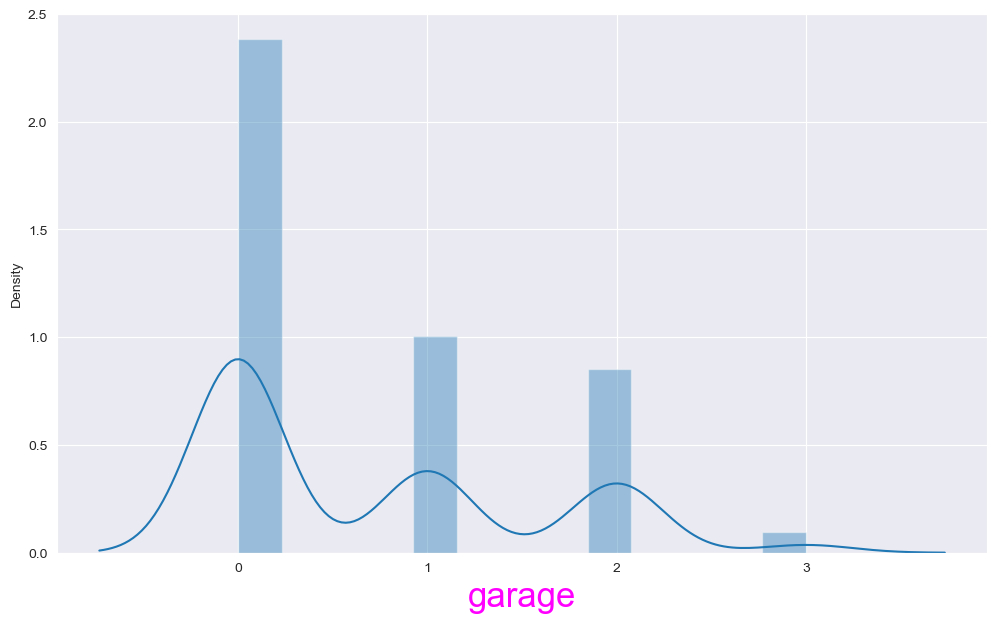

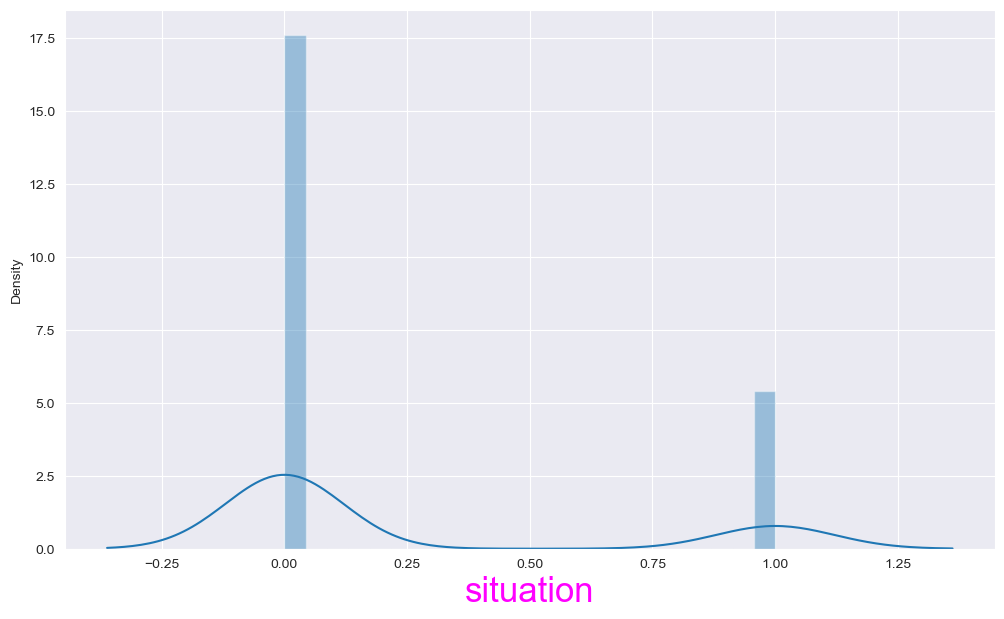

In [105]:
import warnings
warnings.filterwarnings('ignore')
for i in coln:
        plt.subplots(figsize=(12,7))
        sns.distplot(house1[i])
        plt.xlabel(i,fontsize=25,color="magenta")

In [100]:
house2=house1.drop(columns=["price"])

In [101]:
house1["price"]

0       42000
1       38500
2       49500
3       60500
4       61000
        ...  
541     91500
542     94000
543    103000
544    105000
545    105000
Name: price, Length: 544, dtype: int64

In [108]:
house2.columns

Index(['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

In [110]:
house2.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0


In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
scaler=StandardScaler()

In [111]:
scaleddata=scaler.fit_transform(house2)

In [112]:
scaleddf=pd.DataFrame(scaleddata,columns=['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'])

In [114]:
scaleddf.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,0.357215,0.052673,-0.569527,0.220181,0.406057,-0.465835,1.359473,-0.219476,-0.679975,0.359197,-0.5547
1,-0.536722,-1.311807,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
2,-0.990938,0.052673,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
3,0.743782,0.052673,-0.569527,0.220181,0.406057,2.146683,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
4,0.603652,-1.311807,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547


In [116]:
scaleddf[:]

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,0.357215,0.052673,-0.569527,0.220181,0.406057,-0.465835,1.359473,-0.219476,-0.679975,0.359197,-0.5547
1,-0.536722,-1.311807,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
2,-0.990938,0.052673,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
3,0.743782,0.052673,-0.569527,0.220181,0.406057,2.146683,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
4,0.603652,-1.311807,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.5547
...,...,...,...,...,...,...,...,...,...,...,...
539,-0.150155,0.052673,1.442309,2.523612,0.406057,2.146683,-0.735579,-0.219476,1.470643,-0.803918,-0.5547
540,0.429696,0.052673,1.442309,2.523612,0.406057,-0.465835,-0.735579,-0.219476,1.470643,-0.803918,-0.5547
541,0.429696,0.052673,1.442309,2.523612,0.406057,2.146683,-0.735579,-0.219476,1.470643,0.359197,-0.5547
542,0.429696,0.052673,1.442309,0.220181,0.406057,2.146683,-0.735579,-0.219476,1.470643,0.359197,-0.5547


In [120]:
lr=LinearRegression()

In [121]:
x=scaleddf[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y=house1["price"]

In [122]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=95)

In [123]:
x_test.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
251,-0.768662,-1.311807,1.442309,-0.931535,0.406057,-0.465835,1.359473,-0.219476,-0.679975,-0.803918,-0.554700
1,-0.536722,-1.311807,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.554700
498,0.642308,-1.311807,-0.569527,-0.931535,0.406057,-0.465835,-0.735579,-0.219476,1.470643,2.685429,-0.554700
354,-0.391759,4.146114,1.442309,0.220181,0.406057,-0.465835,-0.735579,-0.219476,-0.679975,-0.803918,-0.554700
442,0.294398,-1.311807,-0.569527,0.220181,0.406057,-0.465835,-0.735579,-0.219476,1.470643,-0.803918,1.802776


In [126]:
m1=lr.fit(x_train,y_train)

In [133]:
predicted=m1.predict(x_test)
predicted.shape

(109,)

In [134]:
y_test.shape

(109,)

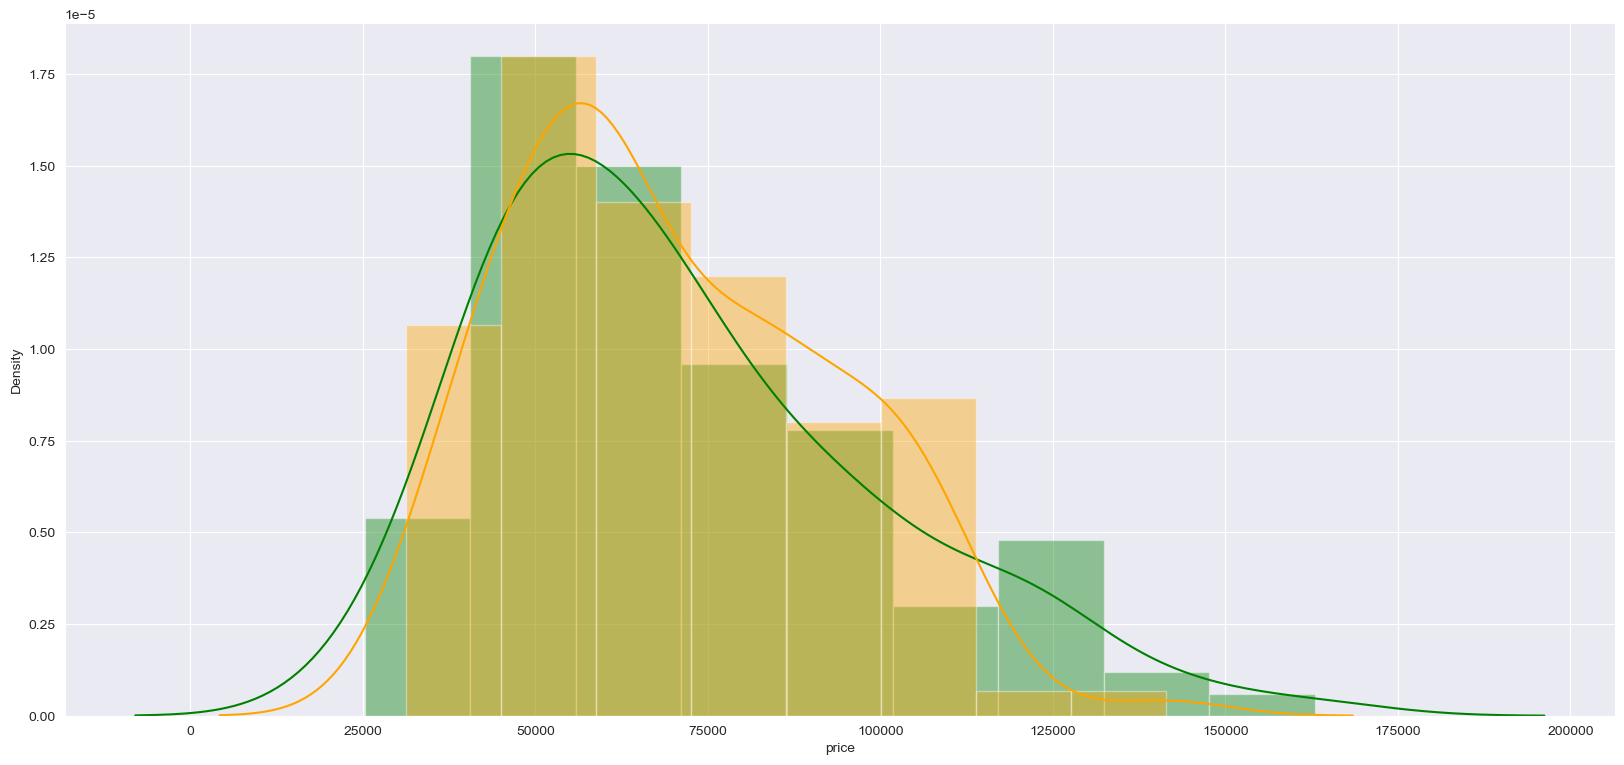

In [159]:
plt.subplots(figsize=(20,9))
sns.distplot(y_test,color="green")
sns.distplot(predicted,color="orange")
plt.lw=6


In [166]:
import statsmodels.api as sm

In [182]:
res = sm.OLS(y_train,sm.add_constant(x_train)).fit()


ValueError: The indices for endog and exog are not aligned